In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from DecisionTreeRegressor import DecisionTreeRegressor as MyDecisionTreeRegressor
from RandomForestRegressor import RandomForestRegressor as MyRandomForestRegressor
%matplotlib inline

In [2]:
boston = load_boston()
X = boston.data
y = boston.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=97)

In [4]:
%%time
depths = []
scores = []

for depth in range(1, 12):
    DTR = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=2)
    depths.append(depth)
    DTR.fit(X_train, y_train)
    scores.append(DTR.score(X_test, y_test)) 

print(max(scores))

0.88495505558
CPU times: user 17.6 ms, sys: 790 µs, total: 18.4 ms
Wall time: 17.9 ms


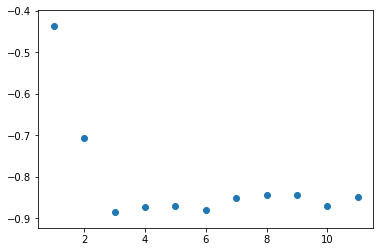

In [5]:
plt.scatter(depths, [-1 * score for score in scores])

In [6]:
%%time
depths = []
scores = []

MyDTR = MyDecisionTreeRegressor()
for depth in range(1, 12):
    depths.append(depth)
    MyDTR.fit(X_train, y_train, max_depth=depth)
    scores.append(MyDTR.score(X_test, y_test))

print(max(scores))

0.834017889944
CPU times: user 32.6 s, sys: 247 ms, total: 32.9 s
Wall time: 33.3 s


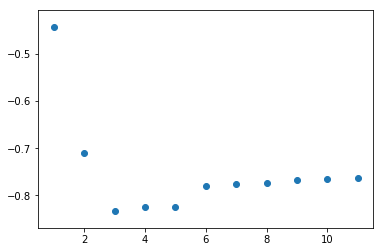

In [7]:
plt.scatter(depths, [-1 * score for score in scores])

In [8]:
%%time
depths = []
scores = []

for depth in range(1, 12):
    RFR = RandomForestRegressor(max_depth=depth, n_estimators=50)
    depths.append(depth)
    RFR.fit(X_train, y_train)
    scores.append(RFR.score(X_test, y_test))

print(max(scores))

0.93189294091
CPU times: user 939 ms, sys: 7.27 ms, total: 946 ms
Wall time: 953 ms


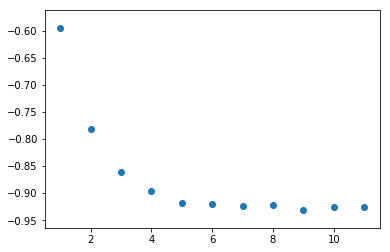

In [9]:
plt.scatter(depths, [-1 * score for score in scores])

In [10]:
%%time
depths = []
scores = []

MyRFR = MyRandomForestRegressor()
for depth in range(1, 12):
    depths.append(depth)
    MyRFR.fit(X_train, y_train, max_depth=depth, n_estimators=50)
    scores.append(MyRFR.score(X_test, y_test)) 

print(max(scores))

0.888399358483
CPU times: user 19min 42s, sys: 8.35 s, total: 19min 50s
Wall time: 20min 7s


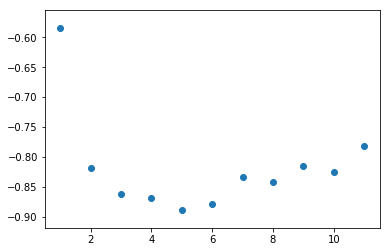

In [11]:
plt.scatter(depths, [-1 * score for score in scores])